**2023/01/13 Machine Learning Study **


KERASを用いてCIFAR-10の画像群をCNNで分類します。畳み込み層とプーリング層を追加しました。活性化関数はrelu,softmaxを使用します。

参考URL
1.   https://www.cs.toronto.edu/~kriz/cifar.html
2.   https://www.tensorflow.org/datasets/catalog/cifar100
3.   https://www.kaggle.com/c/cifar-10


**ライブラリのインポート**

In [63]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import datasets
from tensorflow.keras import utils

In [64]:
# Matplotlibの日本語化
!pip install japanize-matplotlib
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**データの取り込みと確認**

In [65]:
# data
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
# 日本語でラベル付け
cifar10_labels = np.array(['飛行機','クルマ','トリ','ネコ','シカ','イヌ','カエル','ウマ','船','トラック'])

print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000, 1)


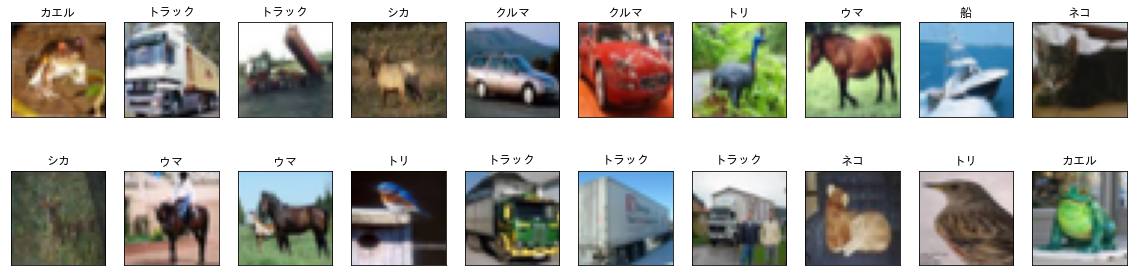

In [66]:
# 画像の表示数: rows(行数), cols(列数)
rows = 2
cols = 10

# 画像番号[0〜(49999-n)の値を入れてください]
index = 0

# 画像を表示
plt.figure(figsize=(20, 5))
for i in range(rows*cols):
	ax = plt.subplot(rows, cols, i + 1)
	plt.imshow(x_train[index+i])
	plt.title(cifar10_labels[y_train[index+i][0]])
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
plt.show()

In [67]:
x_train=x_train/255
x_test=x_test/255
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)

**畳み込み層を2層追加**

In [68]:
model = models.Sequential()
model.add(
layers.Conv2D(
filters=32,
input_shape=(32,32,3),
kernel_size=(3,3),
strides=(1,1),
padding='same',
activation='relu'
)
)
model.add(
layers.Conv2D(
filters=32,
kernel_size=(3,3),
strides=(1,1),
padding='same',
activation='relu'
)
)

**プーリング層を追加**

In [69]:
model.add(layers.MaxPooling2D(pool_size=(2,2)))

**ドロップアウト層を追加**

In [70]:
model.add(layers.Dropout(0.25))

**フィルタの数を2倍にしてもう一回繰り返す。**

In [71]:
model.add(
layers.Conv2D(
filters=64,
kernel_size=(3,3),
strides=(1,1),
padding='same',
activation='relu'
)
)
model.add(
layers.Conv2D(
filters=64,
kernel_size=(3,3),
strides=(1,1),
padding='same',
activation='relu'
)
)
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

**全結合3層でクラス分類**

In [72]:
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=10, activation='softmax'))


**モデルのコンパイル**

In [73]:
model.compile(
loss='categorical_crossentropy', 
optimizer=optimizers.Adam(lr=0.001),
metrics=['acc']
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**モデルのネットワーク構造の表示**

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

**学習(learning)**
バッジサイズ400、エポック数20

In [75]:
history=model.fit(x_train,y_train,epochs=
20,batch_size=400,validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 2s 12ms/step - loss: 1.7485 - acc: 0.3572 - val_loss: 1.4600 - val_acc: 0.4751
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 1.4139 - acc: 0.4906 - val_loss: 1.2623 - val_acc: 0.5532
Epoch 3/20
100/100 [==============================] - 1s 9ms/step - loss: 1.2338 - acc: 0.5583 - val_loss: 1.0991 - val_acc: 0.6136
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 1.1167 - acc: 0.6029 - val_loss: 1.0166 - val_acc: 0.6413
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 1.0133 - acc: 0.6418 - val_loss: 0.9221 - val_acc: 0.6746
Epoch 6/20
100/100 [==============================] - 1s 9ms/step - loss: 0.9370 - acc: 0.6697 - val_loss: 0.8899 - val_acc: 0.6862
Epoch 7/20
100/100 [==============================] - 1s 9ms/step - loss: 0.8674 - acc: 0.6945 - val_loss: 0.8169 - val_acc: 0.7151
Epoch 8/20
100/100 [==============================] - 1s 9ms/step - loss: 0

学習過程（learning process）の
グラフ表示（graph expression） 

<Figure size 432x288 with 0 Axes>

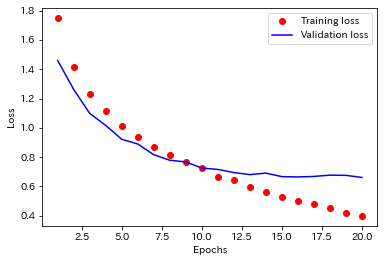

<Figure size 432x288 with 0 Axes>

In [76]:
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
acc=history_dict['acc']
val_acc=history_dict['val_acc']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()


**最後に別のテスト用データで試験**

In [77]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.6828 - acc: 0.7757
[0.6827839016914368, 0.7756999731063843]


エポック数２０、バッジサイズ３２で試してみる

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7999 - acc: 0.7180 - val_loss: 0.7862 - val_acc: 0.7282
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6483 - acc: 0.7706 - val_loss: 0.6962 - val_acc: 0.7585
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5935 - acc: 0.7908 - val_loss: 0.7088 - val_acc: 0.7541
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5512 - acc: 0.8041 - val_loss: 0.7446 - val_acc: 0.7494
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5230 - acc: 0.8159 - val_loss: 0.6883 - val_acc: 0.7719
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4954 - acc: 0.8251 - val_loss: 0.6845 - val_acc: 0.7728
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4596 - acc: 0.8390 - val_loss: 0.7095 - val_acc: 0.7700
Epoch 8/20
1250/1250 [==============================] - 6s 5ms

<Figure size 432x288 with 0 Axes>

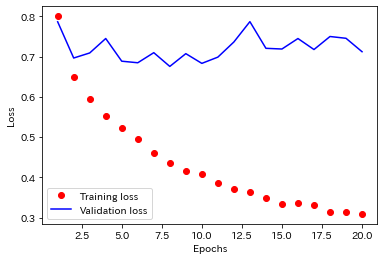

<Figure size 432x288 with 0 Axes>

In [78]:
#エポック数２０、バッジサイズ３２で試してみる
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)
#グラフ
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
acc=history_dict['acc']
val_acc=history_dict['val_acc']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()


エポック数４０、バッジサイズ３２で試してみる

Epoch 1/40
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2986 - acc: 0.8964 - val_loss: 0.7981 - val_acc: 0.7808
Epoch 2/40
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2945 - acc: 0.8998 - val_loss: 0.7483 - val_acc: 0.7845
Epoch 3/40
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2891 - acc: 0.9001 - val_loss: 0.7610 - val_acc: 0.7854
Epoch 4/40
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2881 - acc: 0.9003 - val_loss: 0.7606 - val_acc: 0.7808
Epoch 5/40
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2806 - acc: 0.9041 - val_loss: 0.7330 - val_acc: 0.7822
Epoch 6/40
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2709 - acc: 0.9086 - val_loss: 0.7795 - val_acc: 0.7817
Epoch 7/40
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2729 - acc: 0.9058 - val_loss: 0.7547 - val_acc: 0.7852
Epoch 8/40
1250/1250 [==============================] - 6s 5ms

<Figure size 432x288 with 0 Axes>

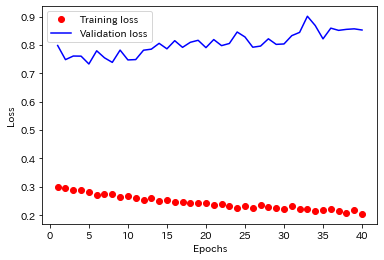

<Figure size 432x288 with 0 Axes>

In [79]:
#エポック数４０、バッジサイズ３２で試してみる
history=model.fit(x_train,y_train,epochs=40,batch_size=32,validation_split=0.2)
#グラフ
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
acc=history_dict['acc']
val_acc=history_dict['val_acc']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

testデータの中身確認して見る

In [80]:
for i in  range(10):
  print(x_test[i],y_test[i])

[[[0.61960784 0.43921569 0.19215686]
  [0.62352941 0.43529412 0.18431373]
  [0.64705882 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254902 0.14117647]
  [0.49411765 0.35686275 0.14117647]
  [0.45490196 0.33333333 0.12941176]]

 [[0.59607843 0.43921569 0.2       ]
  [0.59215686 0.43137255 0.15686275]
  [0.62352941 0.44705882 0.17647059]
  ...
  [0.53333333 0.37254902 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509804 0.13333333]]

 [[0.59215686 0.43137255 0.18431373]
  [0.59215686 0.42745098 0.12941176]
  [0.61960784 0.43529412 0.14117647]
  ...
  [0.54509804 0.38431373 0.13333333]
  [0.50980392 0.37254902 0.13333333]
  [0.47058824 0.34901961 0.12941176]]

 ...

 [[0.26666667 0.48627451 0.69411765]
  [0.16470588 0.39215686 0.58039216]
  [0.12156863 0.34509804 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254902]
  [0.05098039 0.25098039 0.42352941]
  [0.15686275 0.33333333 0.49803922]]

 [[0.23921569 0.45490196 0.65882353]
  [0.19215686 0.4        0.58039216]
